In [1]:
import pandas as pd
import numpy as np

folderpath = "/opt/helthcare-final-project-autism/notebooks/data/raw/childhealthdata/2017-2018_NSCH_Topical_CSV_DRC_Jan2020"
filepath = f"{folderpath}/2017-2018 NSCH_Topical_DRC_Dec 2019.csv"

column_description_path = f"{folderpath}/2017-2018 NSCH_Topical_DRC_Variable List.xlsx"
# set seed for reproducibility
np.random.seed(0)

In [2]:
df = pd.read_csv(filepath, index_col='HHID')

### Convert missing values code to NaN
```SPSS Codebook_ 2017-2018NSCH_DRCv1_12.31.19.pdf page 6, missing values codes```

In [3]:
df = df.replace([90, 95, 96, 99], np.nan)

In [4]:
df.describe()

,FIPSST,STRATUM,FORMTYPE,TOTKIDS_R,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,MOMAGE,K6Q41R_STILL,...,npm15AdIns_1718,nom14TthDec_1718,nom17_1CSHCN_1718,nom17_2sysCSHCN_1718,nom17_3ASD_1718,nom17_4ADHD_1718,nom18MHlth_1718,nom19ChHSt_1718,nom20obese_1718,nom25ForgoneHC_1718
count,52129.000000,52129.000000,52129.000000,52129.000000,51837.000000,52129.000000,52129.000000,1353.000000,50858.000000,12137.000000,...,51973.000000,49967.000000,52129.000000,11888.000000,45050.000000,44703.000000,6677.000000,51997.000000,26266.000000,51948.000000
mean,28.884249,1.085461,2.129659,1.844424,1.100353,9.453989,1.481210,5.229120,30.033072,1.875093,...,1.329306,1.902596,1.771950,1.847998,2.939512,2.788157,1.449753,1.093005,2.343334,1.974417
std,15.632091,0.279569,0.823569,0.869455,0.397198,5.235818,0.499652,3.303998,5.821358,0.330627,...,0.469966,0.296510,0.419579,0.359038,0.339821,0.608352,0.497506,0.331566,0.786615,0.157890
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,18.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,16.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,3.000000,26.000000,2.000000,...,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000
50%,29.000000,1.000000,2.000000,2.000000,1.000000,10.000000,1.000000,4.000000,30.000000,2.000000,...,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000
75%,42.000000,1.000000,3.000000,2.000000,1.000000,14.000000,2.000000,7.000000,34.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,3.000000,2.000000
max,56.000000,2.000000,3.000000,4.000000,3.000000,17.000000,2.000000,15.000000,45.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,4.000000,2.000000


In [5]:
df.sample(5)

,FIPSST,STRATUM,FORMTYPE,TOTKIDS_R,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,MOMAGE,K6Q41R_STILL,...,npm15AdIns_1718,nom14TthDec_1718,nom17_1CSHCN_1718,nom17_2sysCSHCN_1718,nom17_3ASD_1718,nom17_4ADHD_1718,nom18MHlth_1718,nom19ChHSt_1718,nom20obese_1718,nom25ForgoneHC_1718
HHID,,,,,,,,,,,,,,,,,,,,,
18108773,45,1,2,1,1.0,11,1,NaN,32.0,NaN,...,1.0,2.0,2,NaN,3.0,3.0,NaN,1.0,4.0,2.0
17147697,15,1,2,1,1.0,6,1,NaN,21.0,NaN,...,1.0,2.0,2,NaN,3.0,3.0,NaN,1.0,NaN,2.0
17045816,21,1,2,2,1.0,6,1,NaN,NaN,NaN,...,1.0,2.0,1,2.0,3.0,NaN,2.0,2.0,NaN,2.0
18094164,15,1,3,2,1.0,13,2,NaN,29.0,NaN,...,1.0,1.0,2,NaN,3.0,3.0,NaN,1.0,2.0,2.0
18027662,56,1,1,2,1.0,5,2,NaN,32.0,2.0,...,2.0,2.0,2,NaN,3.0,3.0,NaN,1.0,NaN,2.0


In [27]:
missing_values_count = df.isnull().sum()/len(df.index)
missing_values_count = missing_values_count.sort_values(ascending=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


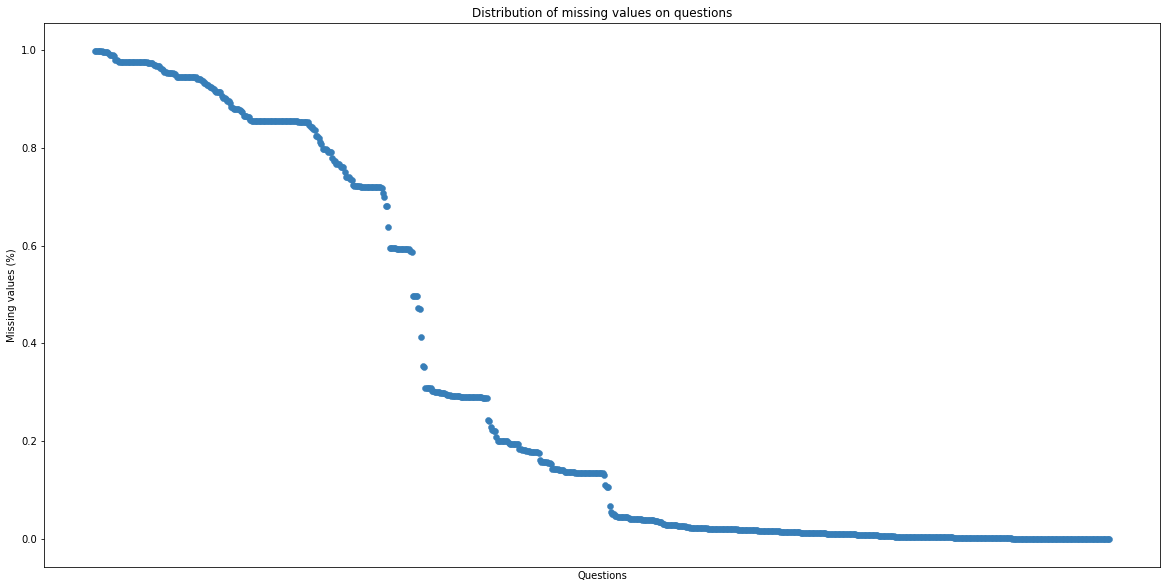

In [28]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from seaborn import palplot, color_palette


cfg = {'linewidth':0.5,
      'marker':'o'}

plt.figure(figsize=(20, 10))
fig = plt.scatter(missing_values_count.index, missing_values_count.values, c=(color_palette("Set1"))[1], **cfg)

plt.title("Distribution of missing values on questions")
plt.ylabel('Missing values (%)')
plt.xlabel('Questions')
plt.xticks(list())

plt.show()

In [39]:
have_autism = df[['K2Q35B']].fillna(2)
print(f"{len(have_autism[have_autism.K2Q35B==1])} are diagnosticated with asd and {len(have_autism[have_autism.K2Q35B==2])} dont")

1345 are diagnosticated with asd and 50784 dont


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Plot a simple histogram with binsize determined automatically
fig = sns.distplot(missing_values_count, bins=20, kde=False, color="b")

In [ ]:
for col in df.columns:
    print(f"{col} -- {df[col].unique().size}", end='')
    if df[col].unique().size < 100:
        print(f" -- {df[col].unique()}")
    else:
        print('')

### Columns related to autism

* **K2Q35A_1_YEARS** - Autism ASD - First Told Age in Years
* **K2Q35A** - Autism ASD
* **K2Q35B** -	Autism ASD Currently
* **AUTISMMED** - Autism ASD - Medication Currently
* **AUTISMTREAT** - Autism ASD - Behavioral Treatment
* **K2Q35C** - Autism ASD Severity Description
* **K2Q35D** - Autism ASD - First Told Doctor Type 
* **autism_1718** - Children who currently have Autism or Autism Spectrum Disorder including Asperger's Disorder, pervasive developmental disorder, age 3-17 years
* **AutismSev_1718** - Parent-rated severity of child's current autism/ASD, age 3-17 years
* **AutismInd_1718** - Indicator 2.8: Children who currently have Autism or Autism Spectrum Disorder including Asperger's Disorder, pervasive developmental disorder, age 3-17 years
* **ASDSevInd_1718** -	Indicator 2.8a: Parent-rated severity of current Autism or Autism Spectrum Disorder, age 3-17 years
* **ASDMed_1718** -	Indicator 2.8b: Children currently taking medication for Autism, ASD, Asperger's Disorder or PDD, age 3-17 years
* **ASDBehTreat_1718** -	Indicator 2.8c: Received behavioral treatment for Autsim, ASD, Asperger's Disorder or PDD, age 3-17 years
* **ASDAge_1718** -	Indicator 2.8d: Age of diagnosis for Autism or ASD, age 3-17 years
* **ASDDrType_1718** -	Indicator 2.8e: Type of doctor or other health care provider who was the first to tell that this child had Autism, ASD, difficulties with emotions, concentration, or behavior, age 3-17 years
* **MedEmotion_1718** -	Indicator 2.9: Children who are taking medication for ADD/ADHD, ASD, difficulties with emotions, concentration, or behavior, age 3-17 years
* **MEDB10ScrQ5_1718** - Children qualifying CSHCN Screener question 5 or experience one of the 10 MEDB conditions, age 3-17 (ADHD, depression, anxiety, behavior, autism, dev delay, Tourette, speech, intellectual disability or learning
* **nom17_3ASD_1718** -	National Outcome Measure 17.3: Percent of children, ages 3 through 17, diagnosed with an autism spectrum disorder

In [ ]:
df_vars = pd.read_excel(f"{folderpath}/test.xlsx", header=None, names=["column", "description"], index_col="column")

terms = ["autism", "asd"]
autism_related_columns = df_vars[df_vars['description'].fillna('').str.contains(f"({'|'.join(terms)})", case=False)].column.values.tolist()

In [ ]:
for col in autism_related_columns:
    print(df.reset_index().fillna(9999).groupby([col]).count()['HHID'])
    print('')

In [ ]:
df_without_autism_columns = df[[col for col in df.columns.values if col not in autism_related_columns or col == 'K2Q35B']]
# df_without_autism_columns.to_csv(f"{folderpath}/cleaned_without_autism_cols.csv.gzip")